In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import pathlib
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = '/content/drive/MyDrive/dataset-ai'
!ls {base_dir}

test  train  val


In [ ]:
test_dir = os.path.join(base_dir, 'test')
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [ ]:
dir_name = base_dir

datas = {}
header = []

for dir in os.listdir(dir_name):
    sub_dir_name = os.path.join(dir_name, dir)
    length = len(os.listdir(sub_dir_name))
    if dir not in datas:
        datas[dir] = [0] * length
    for subdir in os.listdir(sub_dir_name):
        subdir_path = os.path.join(sub_dir_name, subdir)
        count = len(os.listdir(subdir_path))
        if subdir not in header:
            header.append(subdir)
        idx = header.index(subdir)
        datas[dir][idx] = count

df = pd.DataFrame(datas, index=header)
print(df)

            val  train  test
Cabe jawa     3     24     3
Pala          3     24     3
Kapulaga      3     24     3
Kayu manis    3     24     3
Andaliman     3     24     3
Lada          2     23     4
Cengkeh       2     23     4


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 166 images belonging to 7 classes.
Found 19 images belonging to 7 classes.


In [ ]:
x_train, y_train = next(train_generator)
x_val, y_val = next(val_generator)

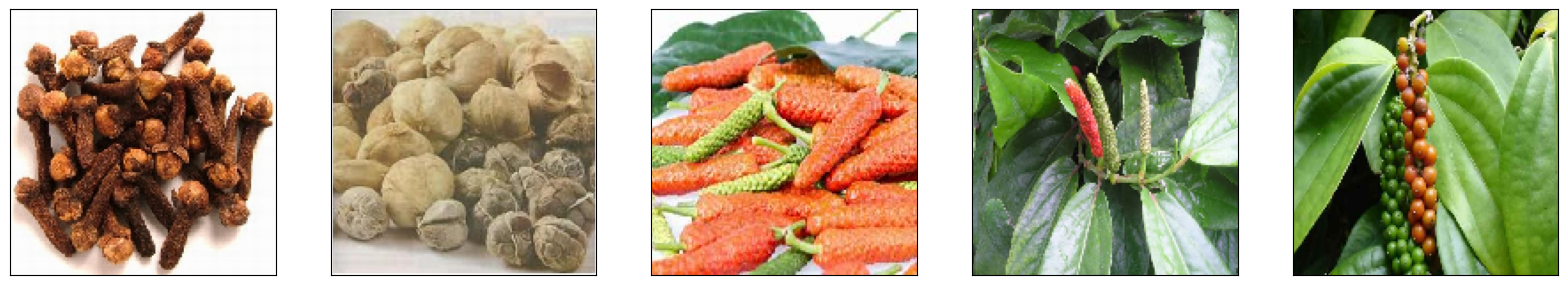

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(5):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
plt.show()

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0

In [ ]:
y_train = to_categorical(y_train, 7)
y_val = to_categorical(y_val, 7)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=0,
    restore_best_weights=True
)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu' ,
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((3, 3)))
model.add(Flatten())
model.add(Dense(7, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=39,
                    validation_data=val_generator,
                    validation_steps=len(val_generator),
                    callbacks=[early_stopping])

Epoch 1/39
6/6 [==============================] - 80s 15s/step - loss: 1.9811 - accuracy: 0.1386 - val_loss: 1.9254 - val_accuracy: 0.2632
Epoch 2/39
6/6 [==============================] - 6s 907ms/step - loss: 1.9381 - accuracy: 0.1566 - val_loss: 1.9272 - val_accuracy: 0.1579
Epoch 3/39
6/6 [==============================] - 5s 742ms/step - loss: 1.9223 - accuracy: 0.1928 - val_loss: 1.9121 - val_accuracy: 0.3684
Epoch 4/39
6/6 [==============================] - 6s 928ms/step - loss: 1.9052 - accuracy: 0.2590 - val_loss: 1.9014 - val_accuracy: 0.3158
Epoch 5/39
6/6 [==============================] - 5s 712ms/step - loss: 1.8812 - accuracy: 0.2892 - val_loss: 1.8797 - val_accuracy: 0.2632
Epoch 6/39
6/6 [==============================] - 5s 715ms/step - loss: 1.8582 - accuracy: 0.1867 - val_loss: 1.8216 - val_accuracy: 0.3158
Epoch 7/39
6/6 [==============================] - 7s 1s/step - loss: 1.8045 - accuracy: 0.3193 - val_loss: 1.7576 - val_accuracy: 0.3158
Epoch 8/39
6/6 [========

In [ ]:
evalution = model.evaluate(val_generator)
print(evalution)

1/1 [==============================] - 1s 569ms/step - loss: 1.2924 - accuracy: 0.4737
[1.292433261871338, 0.4736842215061188]


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

x_test_batch, y_test_batch = next(test_generator)
predictions = model.predict(x_test_batch)
predicted_classes = np.argmax(predictions, axis=1)
class_names = list(test_generator.class_indices.keys())
images_per_row = 5
num_images = len(x_test_batch)
num_rows = (num_images // images_per_row) + (num_images % images_per_row > 0)

plt.figure(figsize=(20, num_rows * 4))
for i in range(num_images):
    plt.subplot(num_rows, images_per_row, i + 1)
    image = x_test_batch[i]
    true_label = np.argmax(y_test_batch[i])
    predicted_label = predicted_classes[i]

    plt.imshow(image)
    plt.title(f"Actual: {class_names[true_label]}\nPredicted: {class_names[predicted_label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [1]:
test_loss, test_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {test_loss}")
print(f"Validation Accuracy: {test_accuracy}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend(loc='upper left')

ax2.plot(history.history['loss'], label='Training Loss', color='blue')
ax2.plot(history.history['val_loss'], label='Validation Loss', color='orange')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Training and Validation Loss')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


NameError: name 'model' is not defined